# ...in Python

## Chronicling America API in Python

by Avery Fernandez

**LOC Chronicling America API Documentation**: https://chroniclingamerica.loc.gov/about/api/

These recipe examples were tested on August 2, 2022.

**Attribution:** We thank ***Professor Jessica Kincaid*** (UA Libraries, Hoole Special Collections) for the use-cases. All data was collected from the Library of Congress, Chronicling America: Historic American Newspapers site, using the API.

Note that the data from the Alabama state intelligencer, The age-herald, and the Birmingham age-herald were contributed to Chronicling America by The University of Alabama Libraries: https://chroniclingamerica.loc.gov/awardees/au/

### 1. Basic API request
The Chronicling America API identifies newspapers and other records using LCCNs. We can query the API once we have the LCCN for the newspaper and even ask for particular issues and editions. For example, the following link lists newspapers published in the state of Alabama, from which the LCCN can be obtained: https://chroniclingamerica.loc.gov/newspapers/?state=Alabama

Here is an example with the Alabama State Intelligencer:

First, import a few Python libraries:

In [1]:
from time import sleep
import requests
from pprint import pprint

Then we can start calling the API

In [2]:
api = "https://chroniclingamerica.loc.gov/"

In [3]:
request = requests.get(api+"lccn/sn84023600.json").json()
pprint(request)

{'end_year': '18??',
 'issues': [],
 'lccn': 'sn84023600',
 'name': 'Alabama State intelligencer. [volume]',
 'place': ['Alabama--Tuscaloosa--Tuscaloosa'],
 'place_of_publication': 'Tuskaloosa [sic], Ala.',
 'publisher': 'T.M. Bradford',
 'start_year': '183?',
 'subject': [],
 'url': 'https://chroniclingamerica.loc.gov/lccn/sn84023600.json'}


Indexing into the json output allows data to be extracted using key names as demonstrated below:

In [4]:
pprint(request["name"])

'Alabama State intelligencer. [volume]'


In [5]:
pprint(request["publisher"])

'T.M. Bradford'


Moving on to another publication, we can get the 182nd page (seq-182) of the Evening Star newspaper published on November 19, 1961.

In [6]:
request = requests.get(api+"lccn/sn83045462/1961-11-19/ed-1/seq-182.json").json()
# outputs a list of links in various formats:
pprint(request)

{'issue': {'date_issued': '1961-11-19',
           'url': 'https://chroniclingamerica.loc.gov/lccn/sn83045462/1961-11-19/ed-1.json'},
 'jp2': 'https://chroniclingamerica.loc.gov/lccn/sn83045462/1961-11-19/ed-1/seq-182.jp2',
 'ocr': 'https://chroniclingamerica.loc.gov/lccn/sn83045462/1961-11-19/ed-1/seq-182/ocr.xml',
 'pdf': 'https://chroniclingamerica.loc.gov/lccn/sn83045462/1961-11-19/ed-1/seq-182.pdf',
 'sequence': 182,
 'text': 'https://chroniclingamerica.loc.gov/lccn/sn83045462/1961-11-19/ed-1/seq-182/ocr.txt',
 'title': {'name': 'Evening star. [volume]',
           'url': 'https://chroniclingamerica.loc.gov/lccn/sn83045462.json'}}


In [7]:
# download and save the PDF
url = request['pdf'] # grabs the url of the pdf
r = requests.get(url, allow_redirects=True) # allow_redirects makes sure the pdf is downloaded
with open('file.pdf', 'wb') as outfile:
    outfile.write(r.content)

### 2. Frequency of “University of Alabama” mentions

The URL below limits to searching newspapers in the state of Alabama and provides 500 results of “University of Alabama” mentions. Note that phrases can be searched by putting them inside parentheses for the query.

In [8]:
request = requests.get(api+"search/pages/results/?state=Alabama&proxtext=(University%20of%20Alabama)&rows=500&format=json").json()
pprint(request["items"][0]) # shows the first item of data

{'alt_title': ['Age-herald', 'Birmingham news, the Birmingham age-herald'],
 'batch': 'au_foster_ver01',
 'city': ['Birmingham'],
 'country': 'Alabama',
 'county': ['Jefferson'],
 'date': '19240713',
 'edition': None,
 'edition_label': '',
 'end_year': 1950,
 'frequency': 'Daily',
 'id': '/lccn/sn85038485/1924-07-13/ed-1/seq-48/',
 'language': ['English'],
 'lccn': 'sn85038485',
 'note': ['Also issued on microfilm from Bell & Howell, Micro Photo Div.; the '
          'Library of Congress, Photoduplication Service.',
          'Also published in a weekly ed.',
          'Archived issues are available in digital format from the Library of '
          'Congress Chronicling America online collection.',
          "Publication suspended with July 12, 1945 issue due to a printers' "
          'strike; resumed publication with Aug. 17, 1945 issue.'],
 'ocr_eng': 'canes at the University .of Alabama\n'
            'MORGAN HALL -\n'
            'SMITH HALL\n'
            "' hi i ..mil w i 1»..II

In [9]:
len(request["items"])

500

In [10]:
# creates a list of dates from each item record
dates = []
for items in range(len(request["items"])):
    dates.append(request["items"][items]["date"])
pprint(dates[0:10]) # show first 10

['19240713',
 '19180818',
 '19240224',
 '19160806',
 '19130618',
 '19240217',
 '19140602',
 '19120714',
 '19220917',
 '19170513']


In [11]:
# converts dates from (e.g., 19180818 to 1918/08/18)
from datetime import datetime
for date in range(len(dates)):
    dates[date] = datetime.strptime(dates[date],'%Y%m%d')
pprint(dates[0:10])

[datetime.datetime(1924, 7, 13, 0, 0),
 datetime.datetime(1918, 8, 18, 0, 0),
 datetime.datetime(1924, 2, 24, 0, 0),
 datetime.datetime(1916, 8, 6, 0, 0),
 datetime.datetime(1913, 6, 18, 0, 0),
 datetime.datetime(1924, 2, 17, 0, 0),
 datetime.datetime(1914, 6, 2, 0, 0),
 datetime.datetime(1912, 7, 14, 0, 0),
 datetime.datetime(1922, 9, 17, 0, 0),
 datetime.datetime(1917, 5, 13, 0, 0)]


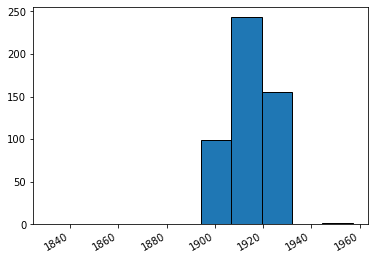

In [12]:
# plot the number of records and dates
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.hist(dates, bins=10,edgecolor='black')
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()

### 3. Sunday Comic Titles in the Age-herald
The Age - Herald published comics every Sunday, we will try to extract the titles of those published on page 15 of the 17th October 1897 edition.

In [13]:
request=requests.get(api+"lccn/sn86072192/1897-10-31/ed-1/seq-14/ocr.txt").text
print(request[0:500]) # show first 500 characters

SONGS AND THEIR SINGERS.
V- ârm QBmAigb* ,-â¢ ... *â¢** -j.
ih
â 'Tis hard to give the hand where the heart can never be!â
âPunch.
A SIMILE FAR FETCHED. A CHANGE OF HEART.
Priscilla is my Klondike girl, HeâI think I shall have to preach
At least I call her so. a bicycle sermon tomorrow advis
There's gold in every straggling ing all my parishioners to ride a
â¢i- curl, wheel.
Alluring in its glow. SheâWhy, Joseph, it was only
The appellation's naught to do, three weeks ago that you


In [14]:
# There is a lot of text here along with random characters and non-interpretable characters.
# Our approach here to get some of the titles will be to only keep 
# uppercase letters and lines that are at least 75% letters
import re
for k in request.split("\n"):
    # [^A-Z]+ replaces all non-uppercase letters with spaces
    line= re.sub(r"[^A-Z]+", ' ', k) # removes everything that is not a capital letter
    spaces = line.count(" ") # counts the number of spaces
    size = len(line) # takes the length of the line
    letters = size-spaces # calculates the letters from the size of line and number of spaces
    if(letters/size>=.75): # checks is the letters make up 75 percent of the line
        print(line)

SONGS AND THEIR SINGERS 
A SIMILE FAR FETCHED A CHANGE OF HEART 
THE PUG DOG PAPA S LAMENT 
TRUE UP TO A CERTAIN POINT SURE TEST 
 SCORCHING AFTER NEW YORK S BICYCLE VOTE 
A HORSE SHOW SUGGESTION 
VAN WYCK ON ONE WHEEL GEORGE IN A BROWN STUDY 
THE DOCTOR S MOTTO SHREWDNESS NEEDED X
HER REPUTATIONS 
THE FINAL CALL 
THE REPLY OF SPAIN 
LOW RIDES ERECT GEN TRACY S CLEVER DODGE 
WHY HE LIKED IT 
PAPA KNOWS 
AN EXCUSE 
NOT FOR HIM 
IN THE FIRELIGHT 
L WHERE NIGHTS LAST SIX MONTHS 
ALACK ALACK 
 T SOUNDED QUEER 
MUCH THE SAME THING 
A KLONDIKER 
THE MAN WHO IS WEARING A DIAMOND RING FOR THE FIRST TIME 


### 4. Industrialization keywords frequency in the Birmingham Age-herald
We will try to obtain the frequency of “Iron” on the front pages of the Birmingham Age- herald newspapers from the year 1900 to 1920. (limited to first 500 rows for testing here)

In [15]:
request = requests.get(api+"search/pages/results/?state=Alabama&lccn=sn85038485&dateFilterType=yearRange&date1=1900&date2=1920&sequence=1&andtext=Iron&rows=500&searchType=advanced&format=json").json()

In [19]:
# pprint(request["items"][0])
dates = []
for item in range(len(request["items"])):
    dates.append(request["items"][item]["date"])
pprint(dates[0:10])

['19090113',
 '19120123',
 '19170310',
 '19060816',
 '19090626',
 '19050404',
 '19120215',
 '19080108',
 '19060412',
 '19110803']


In [20]:
len(dates)

500

In [21]:
from datetime import datetime
for date in range(len(dates)):
    dates[date] = datetime.strptime(dates[date],'%Y%m%d')
pprint(dates[0:10])

[datetime.datetime(1909, 1, 13, 0, 0),
 datetime.datetime(1912, 1, 23, 0, 0),
 datetime.datetime(1917, 3, 10, 0, 0),
 datetime.datetime(1906, 8, 16, 0, 0),
 datetime.datetime(1909, 6, 26, 0, 0),
 datetime.datetime(1905, 4, 4, 0, 0),
 datetime.datetime(1912, 2, 15, 0, 0),
 datetime.datetime(1908, 1, 8, 0, 0),
 datetime.datetime(1906, 4, 12, 0, 0),
 datetime.datetime(1911, 8, 3, 0, 0)]


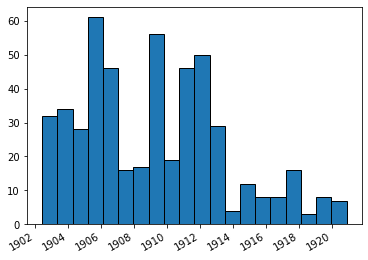

In [22]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.hist(dates, bins=20,edgecolor='black')
# fig.set_size_inches(18.5, 10.5)
# Rotates and right-aligns the x labels so they don't crowd each other.
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=30, horizontalalignment='right')
plt.show()